# <font color='#d35400'> Lab 4 | Simulation Experiments </font>
Welcome to Lab 4! In this lab, we work with the implications of sampling from a probability distribution. We start off this lab by plotting a single normal distribution. We then sample the distribution and look for any relationships. After writing code, we look at the effects of sampling which relate to the potential for Type I and Type II errors. Lastly, we use bootstrapping to estimate a confidence interval for the median of a dataset.

<p align="center">
  <img src="dog_donut_painting.jpg" alt="Alt Text", width="300" />
</p>

### <font color='#FF8C00'> About the Dataset </font>
We start off this Jupyter Notebook by first examining the dataset from `dataset.csv`. We read this `.csv` file into a pandas data frame, upon which we then preview the dataset as a data frame by examining the first 5 rows.

In [3]:
# importing the pandas library
import pandas as pd

# importing the ipython library
from IPython.display import display

# reading the .csv file as a data frame
dataset_df = pd.read_csv("dataset.csv")

# checking for any null values
null_values = dataset_df.isnull().sum()
display("Number of Null Values: ", null_values)

# viewing the dataset
display(dataset_df.head(5))

# obtaining summary statistics
display(dataset_df.info())

# obtaining the description 
display(dataset_df.describe())

# displaying the median values
display(dataset_df.median())

'Number of Null Values: '

variable_1    0
variable_2    0
variable_3    0
dtype: int64

,variable_1,variable_2,variable_3
0,-0.479814,2.400563,0.962635
1,1.045241,0.698030,0.917124
2,1.593543,1.497861,0.736001
3,-0.664951,-0.124943,0.599193
4,0.119142,1.052656,0.728300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   variable_1  500 non-null    float64
 1   variable_2  500 non-null    float64
 2   variable_3  500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


None

,variable_1,variable_2,variable_3
count,500.000000,500.000000,500.000000
mean,-0.002162,0.822616,0.942165
std,0.996963,1.006288,1.004571
min,-2.989982,-2.428388,-1.731287
25%,-0.666835,0.176737,0.303725
50%,0.032894,0.797405,0.938862
75%,0.649753,1.498369,1.551920
max,3.057066,4.150901,3.623870


variable_1    0.032894
variable_2    0.797405
variable_3    0.938862
dtype: float64

As we can see in this dataset, the three features collectively `variable_1`, `variable_2` and `variable_3`, are all of the data type `float64`.  There are 500 observations collectively. When we looked for any missing values, we happened to find none. Here are the summary statistics presented as follows:

<div align="center">


| x                   | variable_1    | variable_2    | variable_3    |  
|:-------------------:|:-------------:|:-------------:|:-------------:|  
| mean                | -0.002162     | 0.822616      | 0.942165      |  
| median              | 0.032894      | 0.797405      | 0.938862      |  
| standard deviation  | 0.996963      | 1.006288      | 1.004571      |  
| maximum             | 3.057066      | 4.150901      | 3.623870      |  
| minimum             | -2.989982     | -2.428388     | -1.731287     |  
| lower quartile      | -0.666835     | 0.176737      | 0.303725      | 
| upper quartile      | 0.649753      | 1.498369      | 1.551920      |  

</div>

When we look at the summary statistics above, we noticed that the mean and median for each of the features are very similar. As a result, it would be difficult to determine whether there is positive skew or negative skew. We can use the `scipy` library to confirm this.

In [5]:
# importing the skew
from scipy.stats import skew

# finding the skewness of each feature
skew_values = dataset_df.skew()
display(skew_values)

variable_1   -0.119045
variable_2    0.112529
variable_3    0.110104
dtype: float64

Looking at the skew values, we can confirm that it is unlikely that each of the variables have any skewness in them. For the `variable_1` feature, since the skewness is less than 0, then the tail is on the left side, which means there is left-skew, which is a negative skew. 

## <font color = '#FF8C00'> Section 1 </font> | Plotting a Normal Distribution
In this section, we are dealing with creating and plotting a normal distribution. Here are the following steps we take to achieve this:
- [x] Import scipy and instantiate a normal distribution with µ = 0 and σ = 1
- [x] Plot the pdf of this distribution (you may find .arange or .linspace useful).
- [x] Plot the cdf of this distribution (you may ﬁnd .arange or .linspace useful).
- [ ] Using the inverse cdf and a unifrom distribution in the range of [0, 1), sample the distribution 1000 times. Plot the histogram of these 1000 observations (hint: lookup he probability point function).

### <font color = '#FF8C00'> Creating & Plotting a Probability Density Function </font>
We start off by creating the probability density function. We initialize a normal distribution object using `norm()` and passing in the mean and standard deviation values. Next, we use `.linspace()` to create a array of equally spaced numbers from the `mean - 5*standard_deviation` to `mean + 5*standard_deviation`, which are plotted using 2000 generated values. 

In [ ]:
# importing the stats library
from scipy.stats import norm

# importing the numpy library
import numpy as np

# initializing the variables
mean = 0
standard_deviation = 1

# instantiating a normal distribution with Mean 1 and SD 1 
normal_distribution = norm(loc=mean, scale=standard_deviation)

# generating the values required for a distribution (2000 is number of points)
x_values = np.linspace(mean - 5*standard_deviation, mean + 5*standard_deviation, 2000);

# calulcating the probability density function
pdf_values = normal_distribution.pdf(x_values)


We then move on to plotting the probability density function. Using the `matplotlib` library, we then plot the X values that we have generated against the density values that were generated after applying the `.pdf` function.

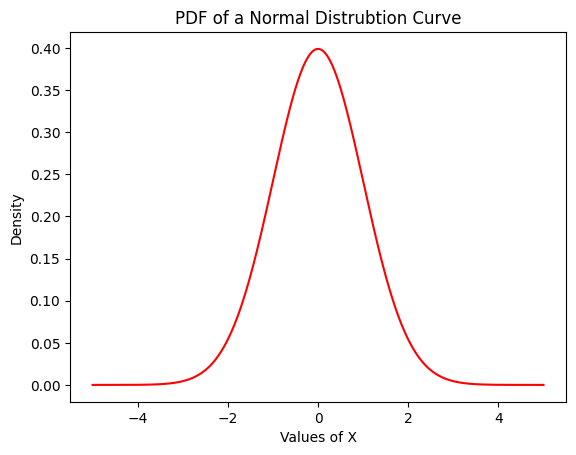

In [11]:
# importing matplotlib
import matplotlib.pyplot as plt

# plotting the normal distribution
plt.plot(x_values, pdf_values, color="red")

# adding the title and labels
plt.title("PDF of a Normal Distrubtion Curve")
plt.xlabel("Values of X")
plt.ylabel("Density")

# displaying the plot
plt.show()

### <font color = '#FF8C00'> Creating & Plotting  Cumulative Distribution Function </font>
Next, we move on to creating the cumulative distribution function. Using the normalized distribution object, which has a passed in mean and standard deviation parameters, and the array of equally spaced numbers using `.linspace()`, we then use `.cdf()` to calculate the cumulative distribution function.

In [12]:
# calculating the cumulative distirbution function
cdf_values = normal_distribution.cdf(x_values)

We then move to plotting the cumulative distribution function. Using the `matplotlib` library, we then plot the X values that we have generated against the cumulative probabilities that were generated after applying the `.cdf` function. 

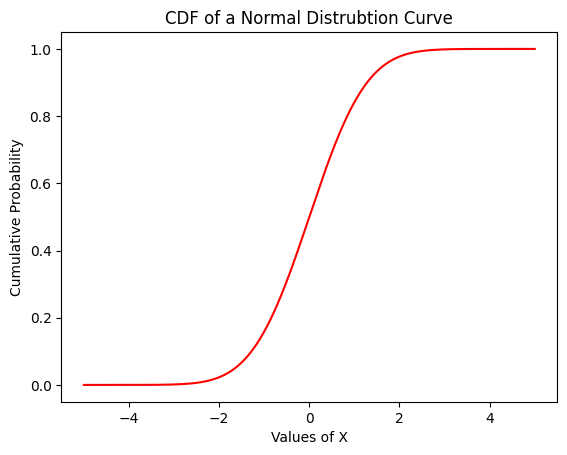

In [14]:
# importing matplotlib
import matplotlib.pyplot as plt

# plotting the normal distribution
plt.plot(x_values, cdf_values, color="red")

# adding the title and labels
plt.title("CDF of a Normal Distrubtion Curve")
plt.xlabel("Values of X")
plt.ylabel("Cumulative Probability")

# displaying the plot
plt.show()

### <font color = '#FF8C00'> The Inverse Cumulative Distribution Function </font>
Next, we use the inverse cumulative distirbution function in the range of [0,1) and a sample of 1000 times. We then move on to plot a histogram of 1000 of these observations.  In order to find the inverse cumulative distribution, we use the `probability point function`, which returns the exact point where the probability of everything to the left is equal to the cumulative probability.

In [20]:
# importing the uniform library from scipy
from scipy.stats import uniform

# generating random unform values between 0 and 1
random_uniform_values = np.random.rand(1000)

# calculating the probability point function values using mean 1 and SD 1
ppf_values = uniform.ppf(random_uniform_values, loc=0, scale=1)

Lastly, we then move on to plotting the probability point function as a histogram. Using the `matplotlib` library, we then plot the probability value on the x-axis and the cumulative probability on the y-axis after applying the `.ppf`.

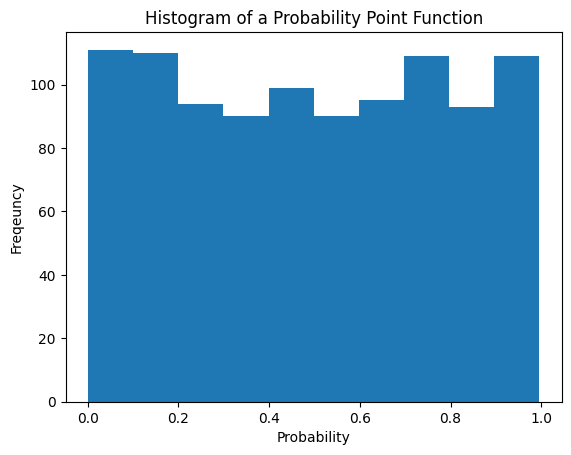

In [23]:
# plotting a histogram
plt.hist(ppf_values)

# setting up the titles and x and y headings
plt.title("Histogram of a Probability Point Function")
plt.xlabel("Probability")
plt.ylabel("Freqeuncy")

# displaying the plot
plt.show()

### <font color='#FF8C00'> Sources Used For Section One </font>
- https://discovery.cs.illinois.edu/learn/Polling-Confidence-Intervals-and-Hypothesis-Testing/Python-Functions-for-Random-Distributions/